In [1]:
import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import feature_detection
import utils

In [2]:
img_list = utils.load_images('../input_image/parrington')

In [3]:
cylinder_img_list = [utils.cylindrical_projection(img, 706) for img in img_list]

In [6]:
cm = feature_detection.harris_corner(cylinder_img_list[0])

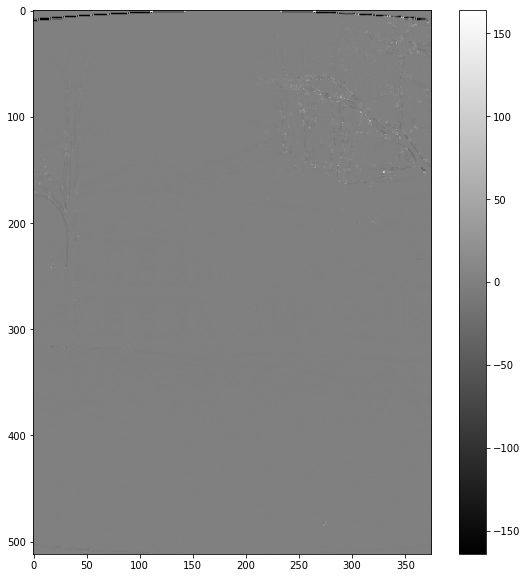

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap='gray')
plt.colorbar()
plt.show()

In [27]:
def extract_description(img, corner_response, threshold=0.01):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    corner_neibor = np.zeros(shape=gray.shape, dtype=np.uint8)
    features = np.zeros(shape=gray.shape, dtype=np.uint8)
    features[corner_response > threshold*corner_response.max()] = 255
    
    #plt.figure(figsize=(10,10))
    #plt.imshow(features, cmap='gray')
    #plt.colorbar()
    #plt.show()
    
    feature_positions = []
    feature_descriptions = np.array([[0,0,0,0,0,0,0,0,0]])
    
    height, width, _ = img.shape
    for y in range(1, height-1):
        for x in range(1, width-1):
            if features[y][x] == 255:
                feature_positions += [[y, x]]
                desc = gray[y-1:y+2, x-1:x+2]
                corner_neibor[y-1:y+2, x-1:x+2] = desc
                feature_descriptions = np.append(feature_descriptions, [desc.flatten()], axis=0)
                
    return feature_descriptions[1:], feature_positions
                

In [29]:
descs, pos = extract_description(cylinder_img_list[0], cm)
pos

[[1, 110],
 [1, 111],
 [1, 112],
 [1, 142],
 [1, 143],
 [1, 144],
 [1, 231],
 [1, 232],
 [1, 233],
 [1, 263],
 [1, 264],
 [1, 265],
 [2, 88],
 [2, 90],
 [2, 110],
 [2, 112],
 [2, 263],
 [2, 265],
 [2, 285],
 [2, 287],
 [3, 70],
 [3, 72],
 [3, 88],
 [3, 90],
 [3, 285],
 [3, 287],
 [3, 303],
 [3, 305],
 [4, 54],
 [4, 56],
 [4, 70],
 [4, 72],
 [4, 303],
 [4, 305],
 [4, 319],
 [4, 321],
 [5, 40],
 [5, 42],
 [5, 54],
 [5, 56],
 [5, 304],
 [5, 305],
 [5, 319],
 [5, 321],
 [5, 333],
 [5, 335],
 [6, 27],
 [6, 29],
 [6, 40],
 [6, 42],
 [6, 330],
 [6, 331],
 [6, 332],
 [6, 333],
 [6, 335],
 [6, 346],
 [6, 348],
 [7, 15],
 [7, 17],
 [7, 27],
 [7, 29],
 [7, 316],
 [7, 333],
 [7, 334],
 [7, 338],
 [7, 339],
 [7, 346],
 [7, 347],
 [7, 348],
 [7, 358],
 [7, 360],
 [8, 4],
 [8, 6],
 [8, 15],
 [8, 17],
 [8, 316],
 [8, 337],
 [8, 338],
 [8, 346],
 [8, 347],
 [8, 348],
 [8, 352],
 [8, 353],
 [8, 354],
 [8, 355],
 [8, 358],
 [8, 360],
 [9, 4],
 [9, 6],
 [9, 333],
 [9, 337],
 [9, 345],
 [9, 373],
 [10, 333

In [31]:
cm2 = feature_detection.harris_corner(cylinder_img_list[1])
descs2, pos2 = extract_description(cylinder_img_list[1], cm2)

In [64]:
def feature_matching(descriptor1, descriptor2, featue_position1, feature_position2):
    matched_pairs = []
    
    for i in range(len(descriptor1)):
        distances = []
        for j in range(len(descriptor2)):
            diff = descriptor1[i] - descriptor2[j]
            diff = (diff**2).sum()
            distances += [diff]
        
        sorted_d = np.sort(distances)
        
        if sorted_d[0]/sorted_d[1] <= 0.1:
            paired_index = np.where(distances==sorted_d[1])[0][0]
            #print(featue_position1[i], paired_index)
            pair = [featue_position1[i], feature_position2[paired_index]]
            matched_pairs += [pair]
            print(pair)
    
    return matched_pairs

In [65]:
matched = feature_matching(descs, descs2, pos, pos2)

c:\users\ssarcandy\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:13: RuntimeWarning: invalid value encountered in long_scalars


[[1, 111], [289, 3]]
[[1, 143], [151, 264]]
[[1, 232], [164, 261]]
[[1, 264], [313, 112]]
[[56, 361], [214, 191]]
[[121, 332], [194, 239]]
[[507, 54], [507, 54]]


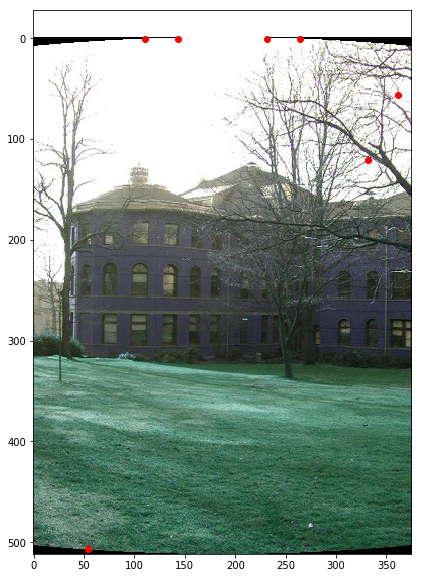

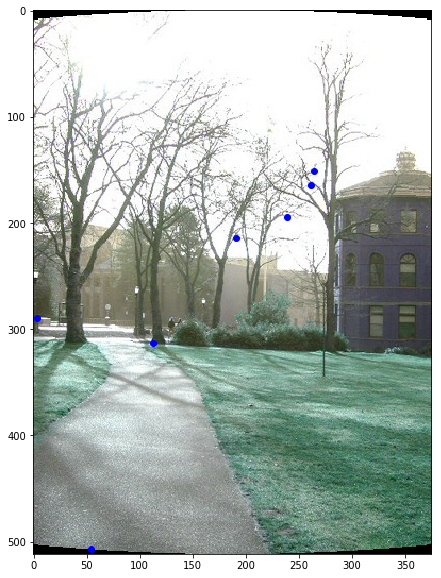

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(cylinder_img_list[0])
for i in range(len(matched)):
    plt.scatter(x=matched[i][0][1], y=matched[i][0][0], c='r')
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(cylinder_img_list[1])
for i in range(len(matched)):
    plt.scatter(x=matched[i][1][1], y=matched[i][1][0], c='b')
plt.show()